# Importa bibliotecas

# Descriçãão  
Estudo sobre técnincas de seleçãão de parâmetros:
- Teste de hipóte.
- Divergencia.
- Teste J 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from google.colab import drive


drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importando os dados

In [ ]:
data = pd.read_csv('/content/drive/My Drive/data.csv')

In [ ]:
data = data.iloc[:,1:-1]

In [ ]:
label_encoder = LabelEncoder()
data.iloc[:,0] = label_encoder.fit_transform(data.iloc[:,0]).astype('float64')

# Seleção dos parametros baseado em p-valor usando a distribuição t

In [ ]:
from scipy import stats

In [ ]:
X = data


In [ ]:
t_p_valor =[]
y = data[data.columns[0]]

for i in np.arange(1,len(data.columns[1:-1])):
    X = data[data.columns[i]]
    w1 = X[y ==0] # dados para comparar da classe 1
    w2 = X[y ==1] # dados para comparar da classe 2
    teste_t = stats.ttest_ind(w1,w2)
    p = teste_t[1]
    t_p_valor.append(p)

In [ ]:
ind = np.where(np.array(t_p_valor) >0.05)[0]

# Parâmetros não selecionados

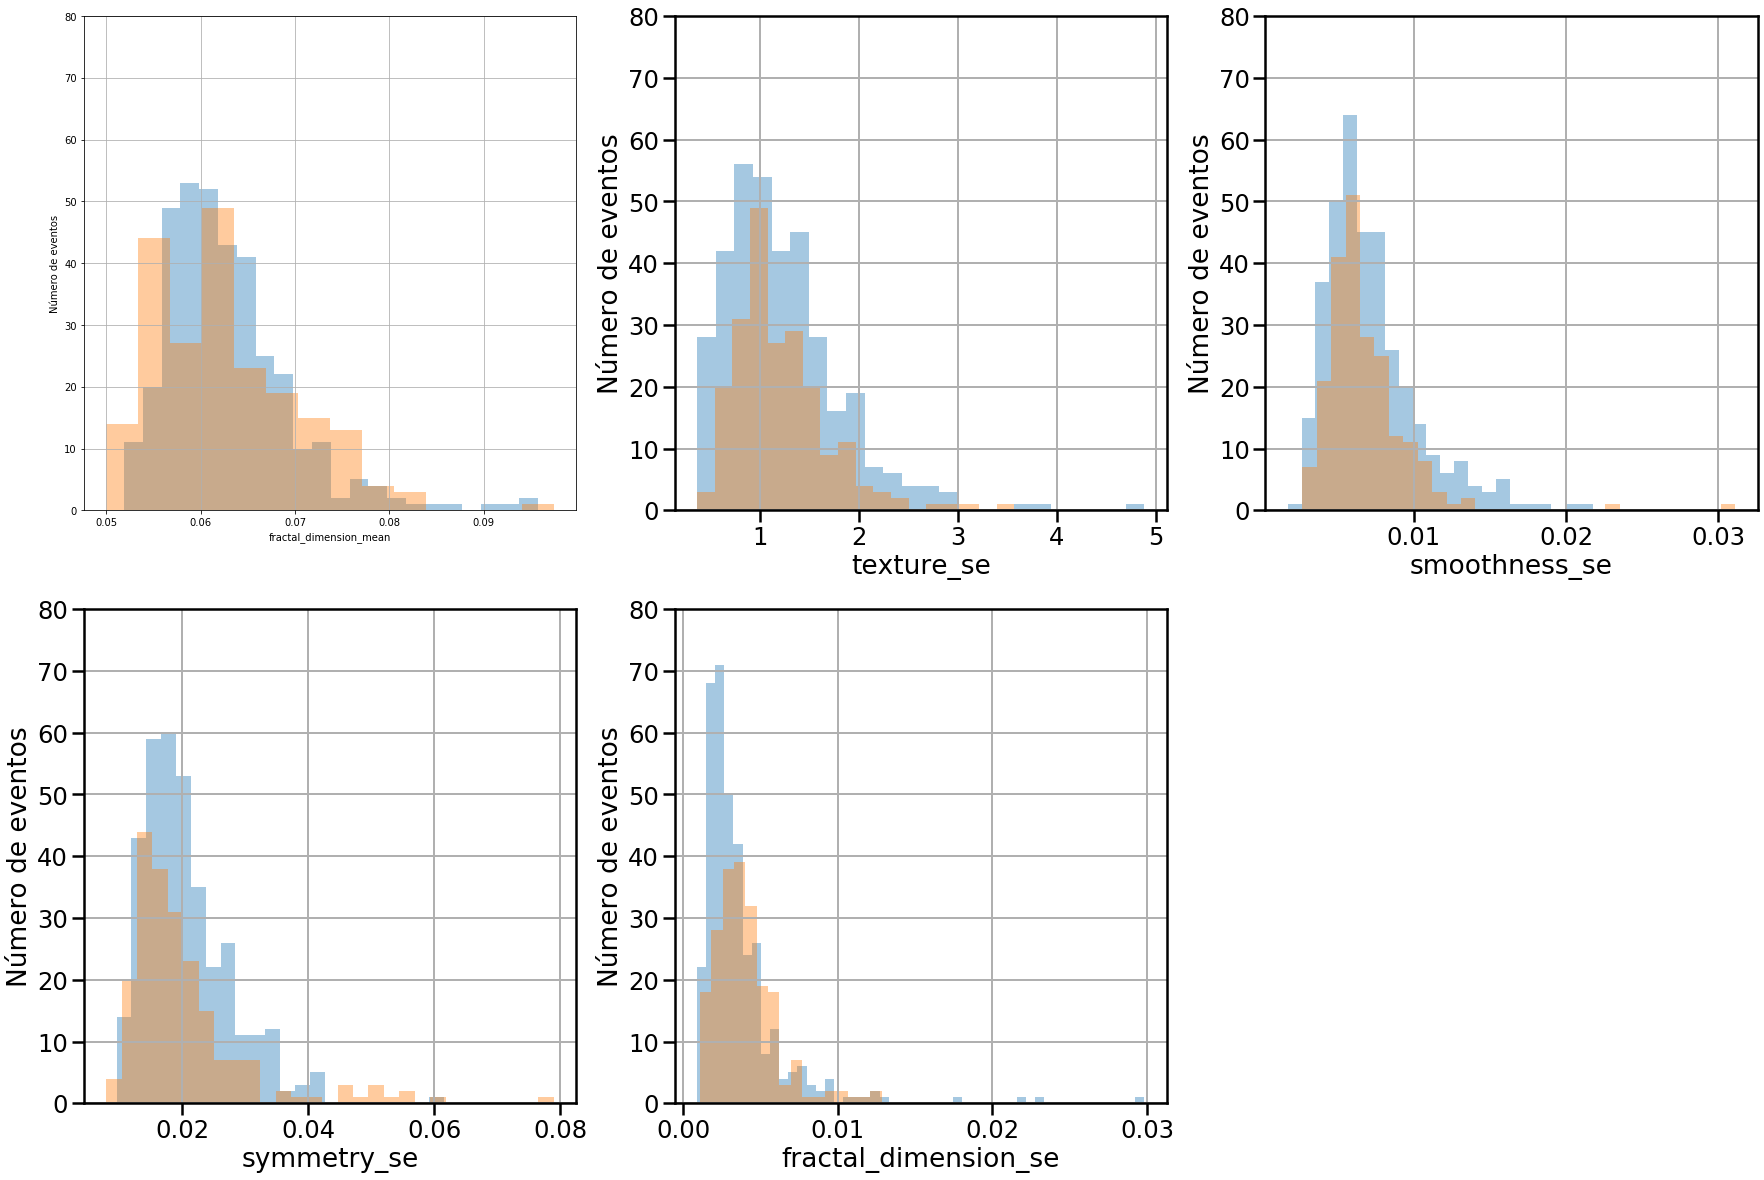

In [ ]:
plt.figure(figsize=[30,20])
for i in range(len(ind)):
    plt.subplot(2,3,i + 1)
    sns.set_context('poster',font_scale=1.1)
    sns.distplot(data[data.columns[ind[i]+1]][data[data.columns[0]] == 0], kde = False)
    sns.distplot(data[data.columns[ind[i]+1]][data[data.columns[0]] == 1], kde = False)
    plt.grid()
    plt.ylim(0,80)
    plt.ylabel('Número de eventos')

# Seleção dos parametros baseado em p-valor usando a distribuição f

In [ ]:
# A distribuição f ela é parecida com a t, só que ela leva em consideração que as vâriancias são diferentes 

In [ ]:
X = data[data.columns[1:-1]]
y = data[data.columns[0]]

In [ ]:
from sklearn.feature_selection import f_classif
f_score, f_p_value = f_classif(X,y)

In [ ]:
ind = np.where(f_p_value >0.05)[0]

# Parâmetros não selecionado 

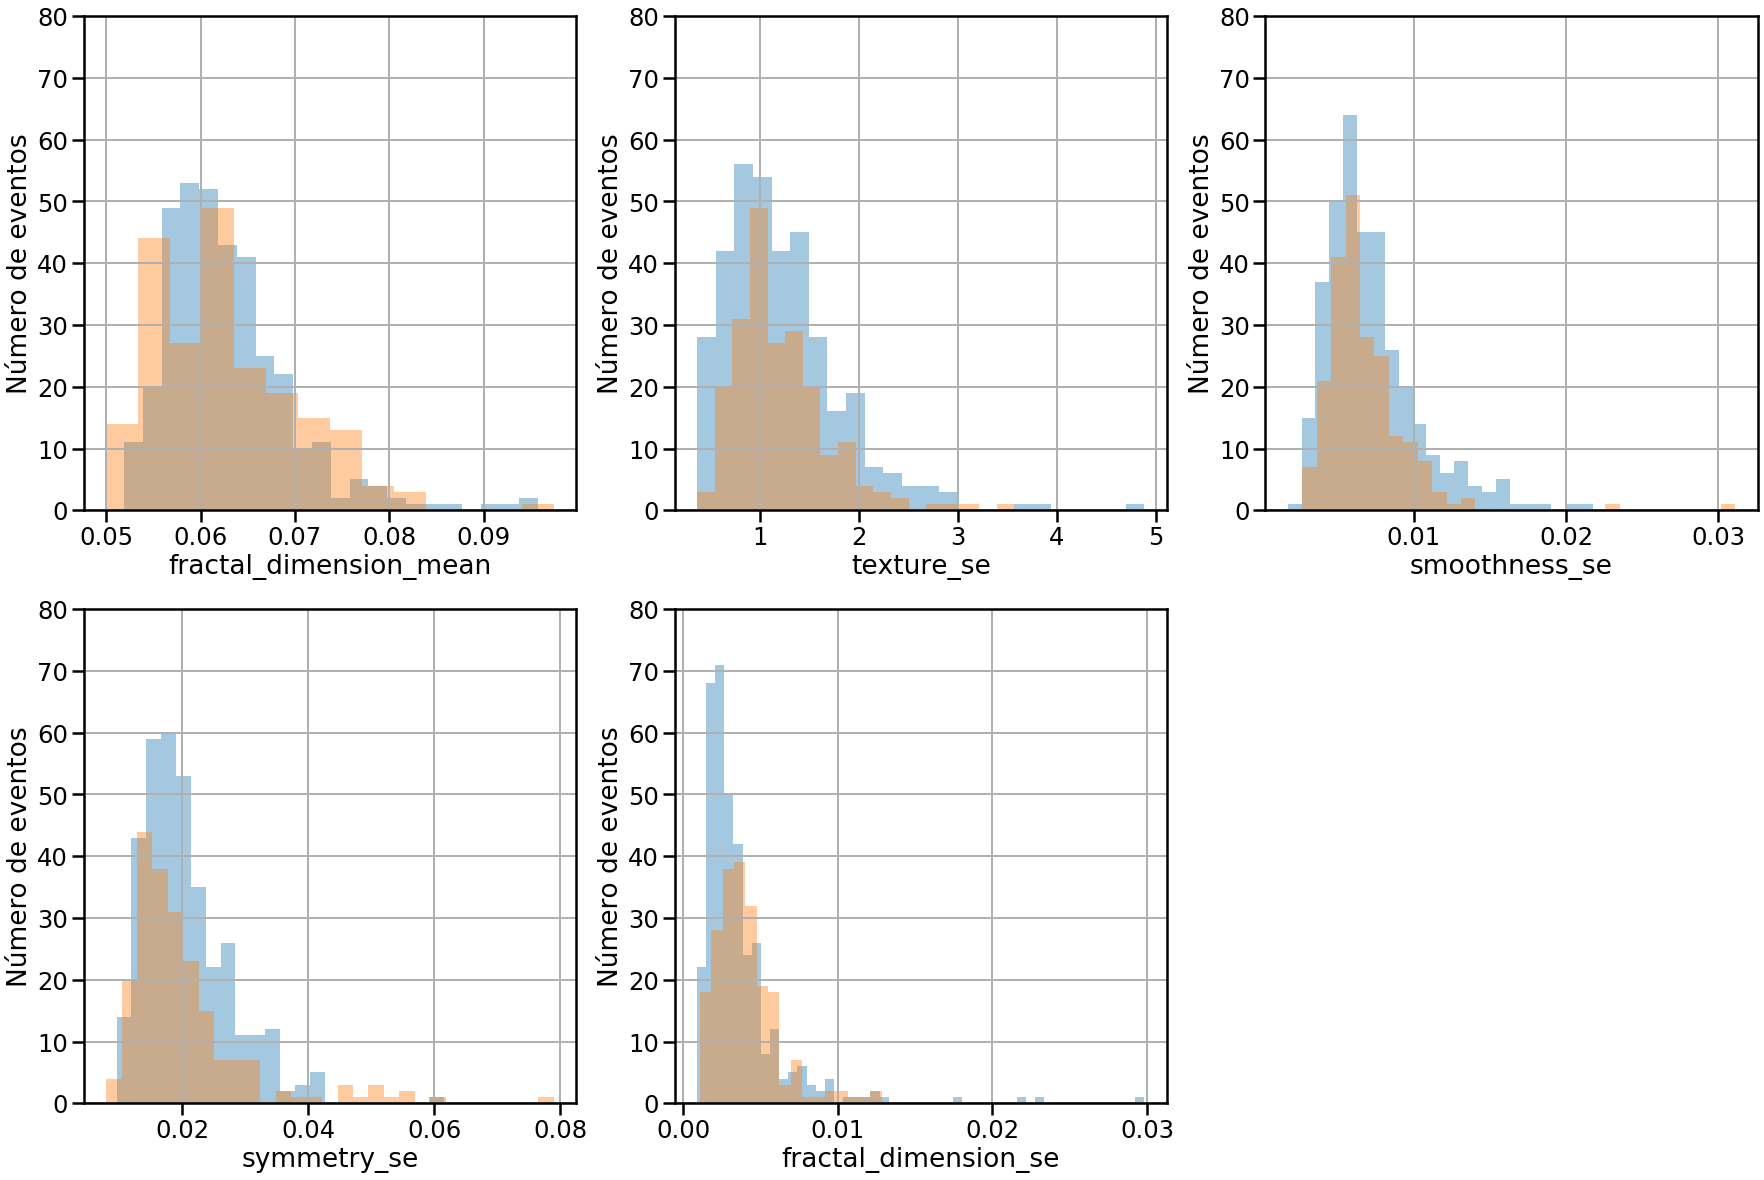

In [ ]:
# esta apontando para os mesmos eventos
plt.figure(figsize=[30,20])
for i in range(len(ind)):
    plt.subplot(2,3,i + 1)
    sns.set_context('poster',font_scale=1.1)
    sns.distplot(data[data.columns[ind[i]+1]][data[data.columns[0]] == 0], kde = False)
    sns.distplot(data[data.columns[ind[i]+1]][data[data.columns[0]] == 1], kde = False)
    plt.grid()
    plt.ylim(0,80)
    plt.ylabel('Número de eventos')

# Separando os dados

In [ ]:
ind = np.where(f_p_value <=0.05)[0]
#X   = data[data.columns[ind+1]]
X = data[data.columns[1:-1]]
y   = data[data.columns[0]]
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.40,random_state=101)


# classificação de paramentros com todos os dados

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix   # instancia de matris de confusão

In [ ]:
logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial',max_iter=500000)
logreg.fit(X_train1,y_train1)
predictions = logreg.predict(X_test1)
cm          = confusion_matrix(y_test1,predictions)                     # matriz confusão
total_T       = np.sum(np.diagonal(cm)/np.sum(np.sum(cm,axis = 0)))      # acertos

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


# Separando os parâmetros que não foram selecionados pelo teste de hipotese

In [ ]:
X_train=X_train1[data.columns[ind+1]]
X_test=X_test1[data.columns[ind+1]]

In [ ]:
logreg.fit(X_train,y_train1)
predictions = logreg.predict(X_test)
cm          = confusion_matrix(y_test1,predictions)                     # matriz confusão
total  = np.sum(np.diagonal(cm)/np.sum(np.sum(cm,axis = 0)))      # acertos

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [ ]:
total

0.9429824561403508

# Removendo um parametro que foi descartado

In [ ]:
#ind  = np.where(f_p_value <=0.05)[0]
#X    = data[data.columns[1:-1]]
#y    = data[data.columns[0]]
#X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.40,random_state=101)

In [ ]:
TOTAL   = []
#logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial',max_iter=100000)
#logreg.fit(X_train1,y_train1)
#predictions = logreg.predict(X_test1)
#cm          = confusion_matrix(y_test1,predictions)                     # matriz confusão
#total       = np.sum(np.diagonal(cm)/np.sum(np.sum(cm,axis = 0)))      # acertos
TOTAL.append(total_T)

In [ ]:
ind     = np.where(f_p_value >0.05)[0]
for i in range(len(ind)):
    X_train = X_train1.drop([data.columns[ind[i]+1]],axis =1)
    X_test  = X_test1.drop([data.columns[ind[i]+1]],axis =1)
    logreg.fit(X_train,y_train1)
    predictions = logreg.predict(X_test)
    cm          = confusion_matrix(y_test1,predictions)               # matriz confusão
    total  = np.sum(np.diagonal(cm)/np.sum(np.sum(cm,axis = 0)))      # acertos
    TOTAL.append(total)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Text(0, 0.5, 'Erro %')

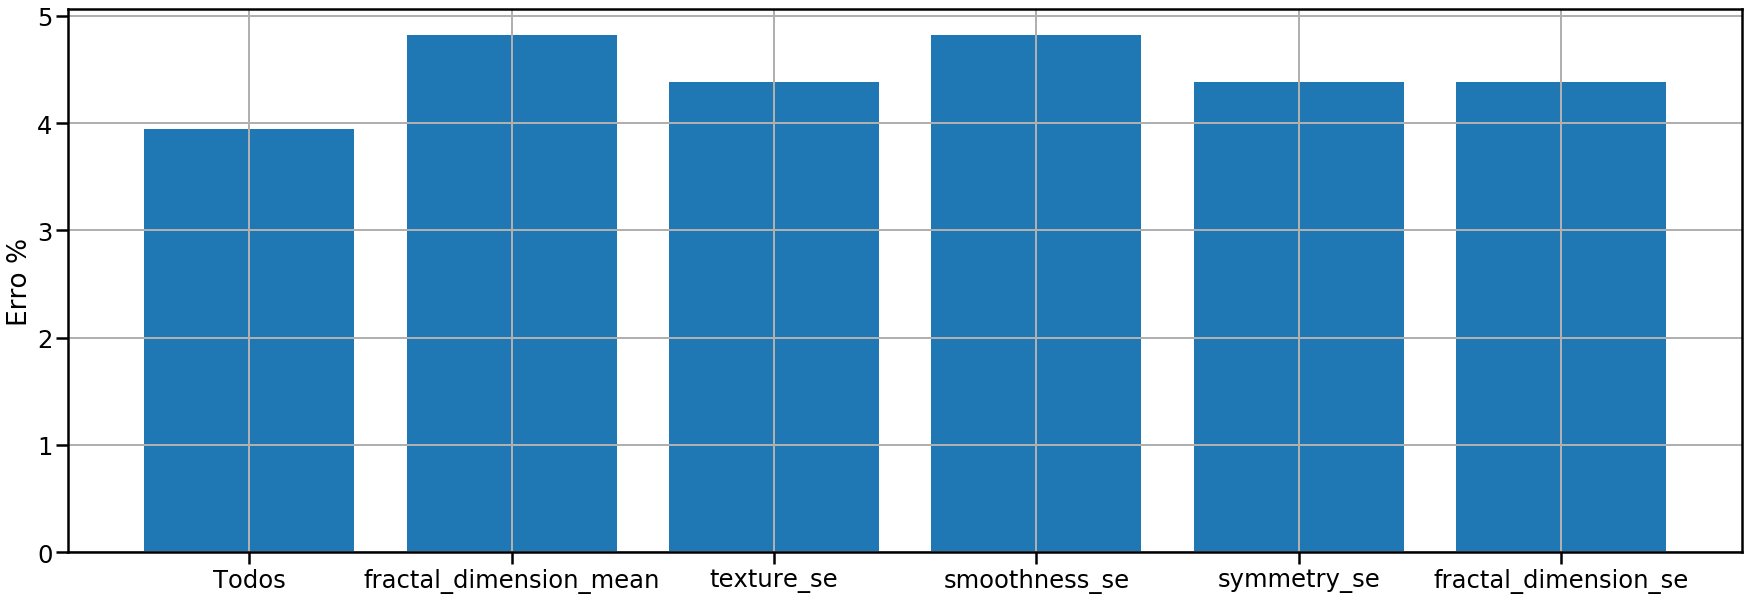

In [ ]:
X  = np.concatenate((np.array(['Todos']),data.columns[ind+1]),axis =0)
plt.figure(figsize=[30,10])
plt.bar(X,(1-np.array(TOTAL))*100)
plt.grid(True)
plt.ylabel('Erro %')

## Divergencia

In [ ]:
X = np.array(data[data.columns[1:-1]])

In [ ]:
def divergencia(X,y):
  S1 = np.cov(X[y==0].T)
  S2 = np.cov(X[y==1].T)

  u1 = np.array(np.mean(X[y==0],axis = 0))
  u2 = np.array(np.mean(X[y==1],axis =0))

  parte1 = (1/2)*np.matrix.trace(np.linalg.inv(S1)*S2 + np.linalg.inv(S2)*S1 + 2*np.eye(S2.shape[0]) )

  parte2 = (u1.reshape(len(u1),1) -u2.reshape(len(u2),1)).T

  parte3 = (np.linalg.inv(S1)-np.linalg.inv(S2))

  parte4 =(u1.reshape(len(u1),1) -u2.reshape(len(u2),1))

  parte5 = np.dot(parte2,parte3)

  parte6 = np.dot(parte5,parte4)

  final =parte1 +parte6

  return final

In [ ]:
div = []
f = divergencia(X,y)

div.append(f)

In [ ]:
X = data[data.columns[1:-1]]

In [ ]:
for i in range(1,29):
  x=X.drop((data.columns[i]),axis =1)
  f=divergencia(np.array(x),y)
  div.append(f)

In [ ]:
div=np.concatenate(div,axis =1)

Text(0, 0.5, 'Divergência 10³')

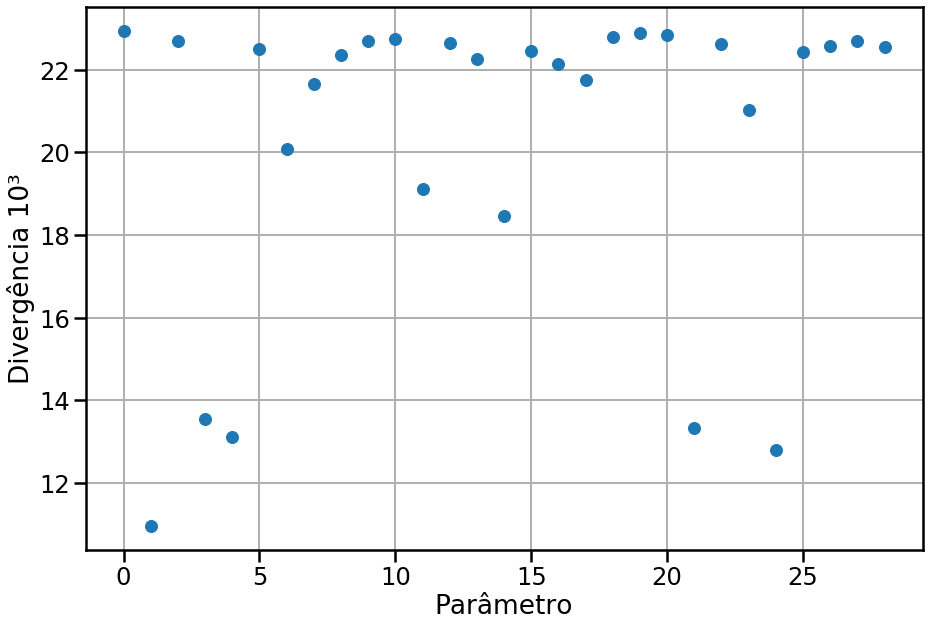

In [ ]:
plt.figure(figsize=[15,10])
plt.plot(div[0]/1000,'o')
plt.grid()
plt.xlabel('Parâmetro')

plt.ylabel('Divergência 10³')

In [ ]:
ind1=np.where(div>18000)[1]
Td = []
Td.append(total_T)
for i in range(len(ind1)):
    X_train = X_train1.drop([data.columns[ind1[i]+1]],axis =1)
    X_test  = X_test1.drop([data.columns[ind1[i]+1]],axis =1)
    logreg.fit(X_train,y_train1)
    predictions = logreg.predict(X_test)
    cm          = confusion_matrix(y_test1,predictions)                     # matriz confusão
    total  = np.sum(np.diagonal(cm)/np.sum(np.sum(cm,axis = 0)))      # acertos
    Td.append(total)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local

Text(0, 0.5, 'Erro %')

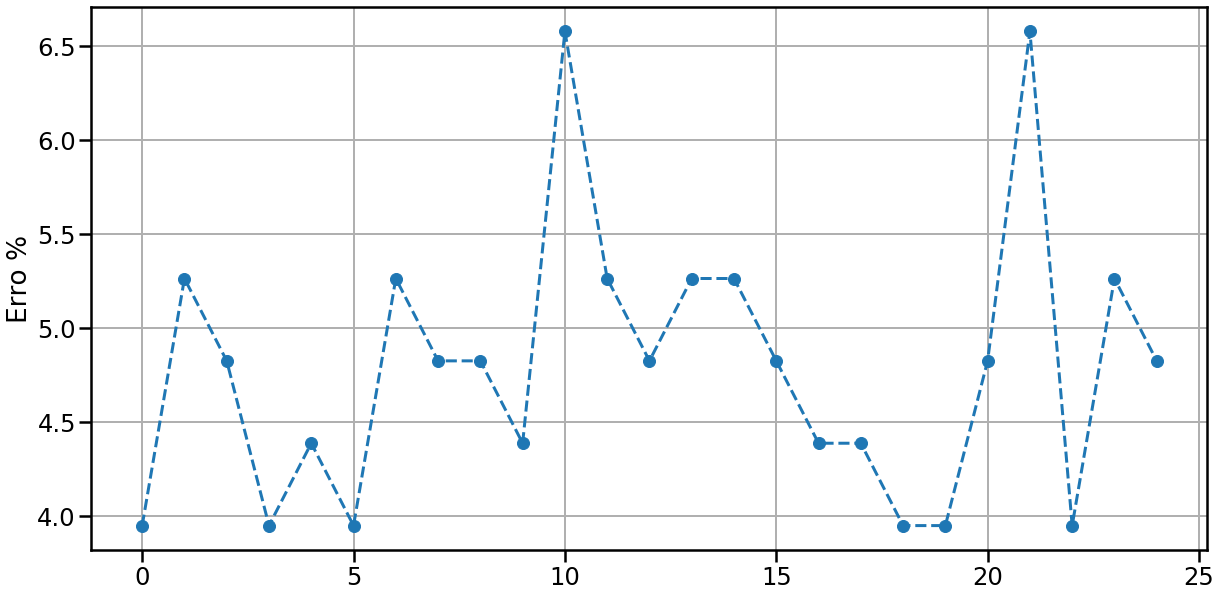

In [ ]:
X  = np.concatenate((np.array(['Todos']),data.columns[ind1+1]),axis =0)
plt.figure(figsize=[20,10])
plt.plot((1-np.array(Td))*100,'--o')
plt.grid(True)
plt.ylabel('Erro %')


# matriz de dispersão

In [ ]:
#X = data.drop(columns[])
X = np.array(data[data.columns[1:-1]])
y = np.array(data[data.columns[0]])

In [ ]:
def matriz_dispe(X,y):

  mean_vectors = []
  for cl in range(0,2):
    mean_vectors.append(np.mean(X[y==cl], axis=0)) # media das classes com os seus devidos parametrosmean_vectors

    S_W = np.zeros((X.shape[1],X.shape[1]))
    for cl,mv in zip(range(1,X.shape[1]), mean_vectors):
      class_sc_mat = np.zeros((X.shape[1],X.shape[1]))                  # scatter matrix for every class
      for row in X[y == cl]:
          row, mv = row.reshape(X.shape[1],1), mv.reshape(X.shape[1],1) # make column vectors
          class_sc_mat += (row-mv).dot((row-mv).T)
      S_W += class_sc_mat

    overall_mean = np.mean(X, axis=0)

    S_B = np.zeros((X.shape[1],X.shape[1]))
    for i,mean_vec in enumerate(mean_vectors):  
      n = X[y==i,:].shape[0]
      mean_vec = mean_vec.reshape(X.shape[1],1) # make column vector
      overall_mean = overall_mean.reshape(X.shape[1],1) # make column vector
      S_B += n*(mean_vec - overall_mean).dot((mean_vec - overall_mean).T)


  S_M = S_B + S_W
  eig_vecs = (np.linalg.inv(S_W).dot(S_M))
  j=np.sum(np.abs(eig_vecs.diagonal()))

  return j
  
  


In [ ]:
J3 = []
j=matriz_dispe(X,y)
J3.append(j)

## testando fator J

In [ ]:
X = data[data.columns[1:-1]]

In [ ]:
for i in range(1,29):
  x=X.drop((data.columns[i]),axis =1)
  j=matriz_dispe(np.array(x),y)
  J3.append(j)

Text(0, 0.5, 'J3')

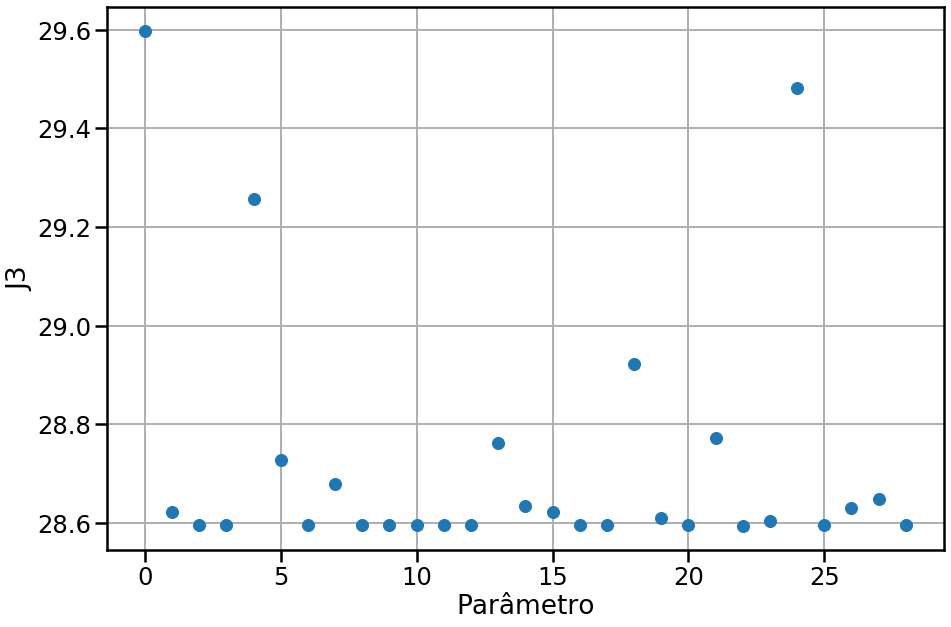

In [ ]:
plt.figure(figsize=[15,10])
plt.plot(J3,'o')
plt.grid()
plt.xlabel('Parâmetro')

plt.ylabel('J3')


In [ ]:
Tj = []
Tj.append(total_T)

In [ ]:
ind1=np.where(np.array(J3)>28.8)[0]
for i in range(len(ind1)):
    X_train = X_train1.drop([data.columns[ind1[i]+1]],axis =1)
    X_test  = X_test1.drop([data.columns[ind1[i]+1]],axis =1)
    logreg.fit(X_train,y_train1)
    predictions = logreg.predict(X_test)
    cm          = confusion_matrix(y_test1,predictions)                     # matriz confusão
    total  = np.sum(np.diagonal(cm)/np.sum(np.sum(cm,axis = 0)))      # acertos
    Tj.append(total)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [ ]:
ind1=np.where(np.array(J3)>28.8)[0]

Text(0, 0.5, 'Erro %')

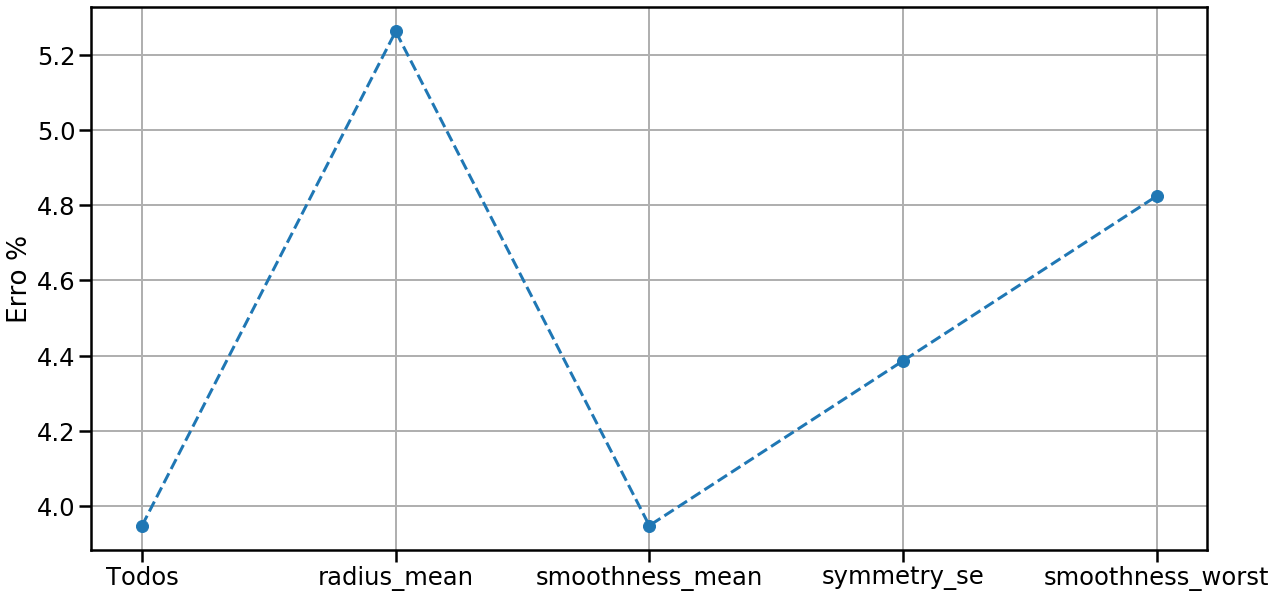

In [ ]:
X  = np.concatenate((np.array(['Todos']),data.columns[ind1+1]),axis =0)
plt.figure(figsize=[20,10])
plt.plot(X,(1-np.array(Tj))*100,'--o')
plt.grid(True)
plt.ylabel('Erro %')
